In [1]:
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

path = "data.csv"

bc = pd.read_csv(path)
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
print(bc.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [3]:
labels_to_remove = ['id','diagnosis','Unnamed: 32']

y = bc['diagnosis']

bc1 = bc.drop(labels_to_remove,axis=1)
bc1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
bc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [5]:
bc1.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

In [6]:
bc1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


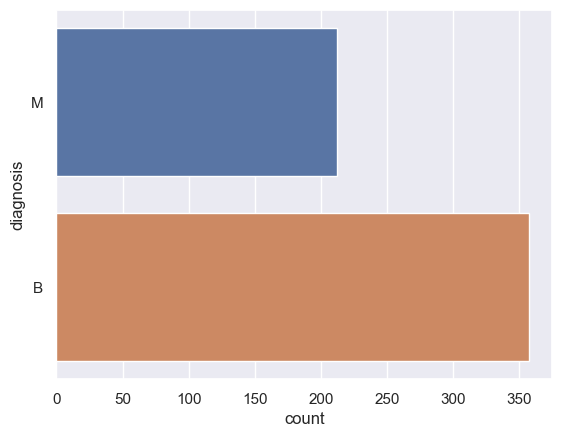

In [7]:
sns.set()
ax1 = sns.countplot(y = 'diagnosis', data = bc ,label="Count")
plt.show()

In [8]:
mean_labels = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
bc2 = bc1[mean_labels]
bc2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


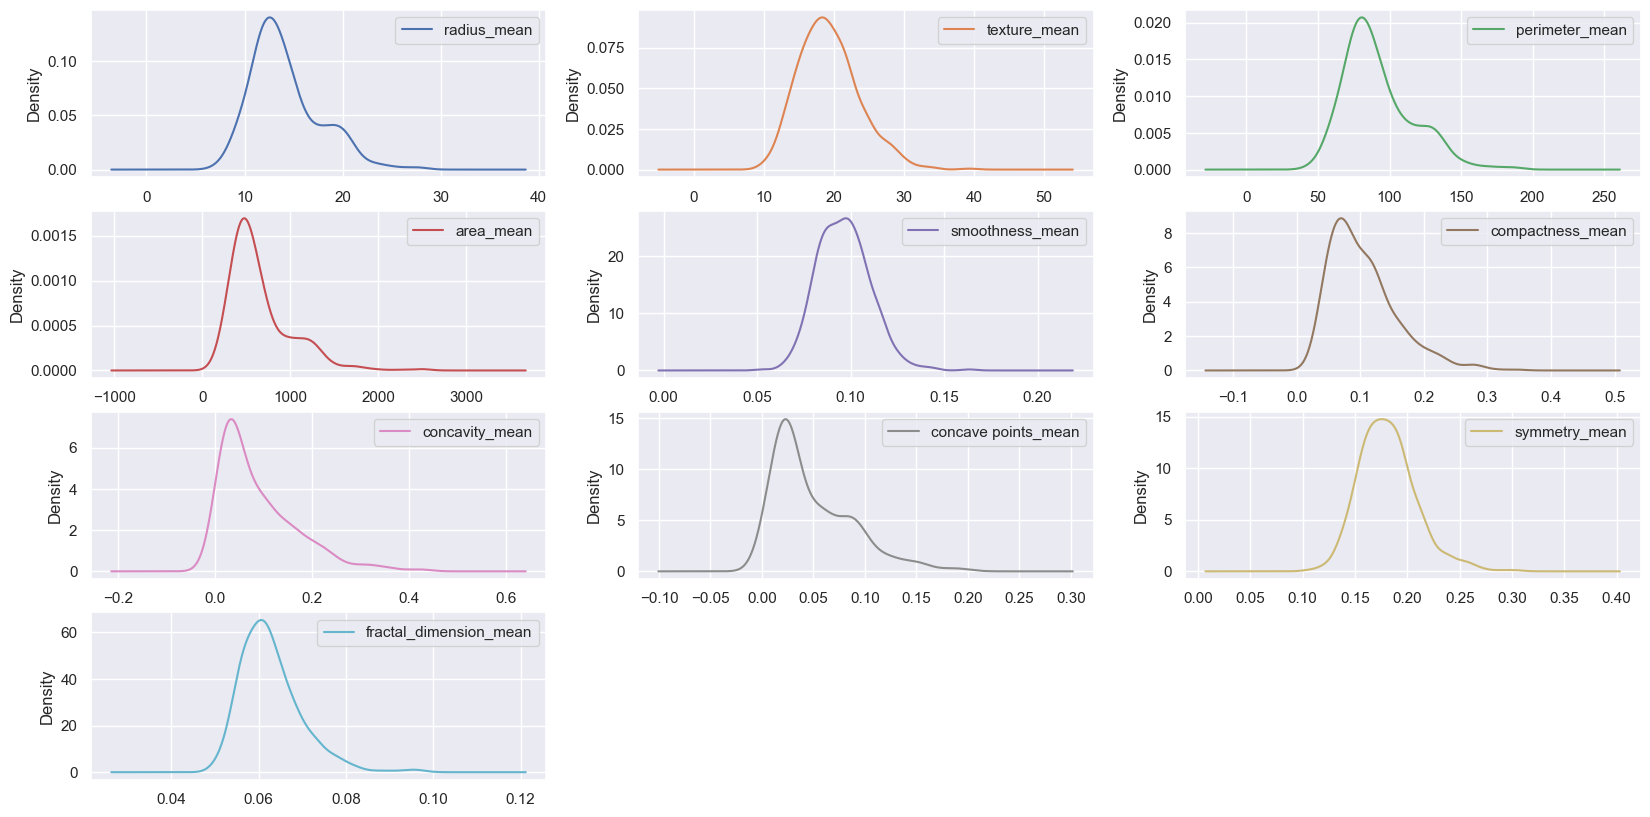

In [9]:
meanplot = bc2.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,figsize=(20,10))
plt.show()

(10.5, -0.5)

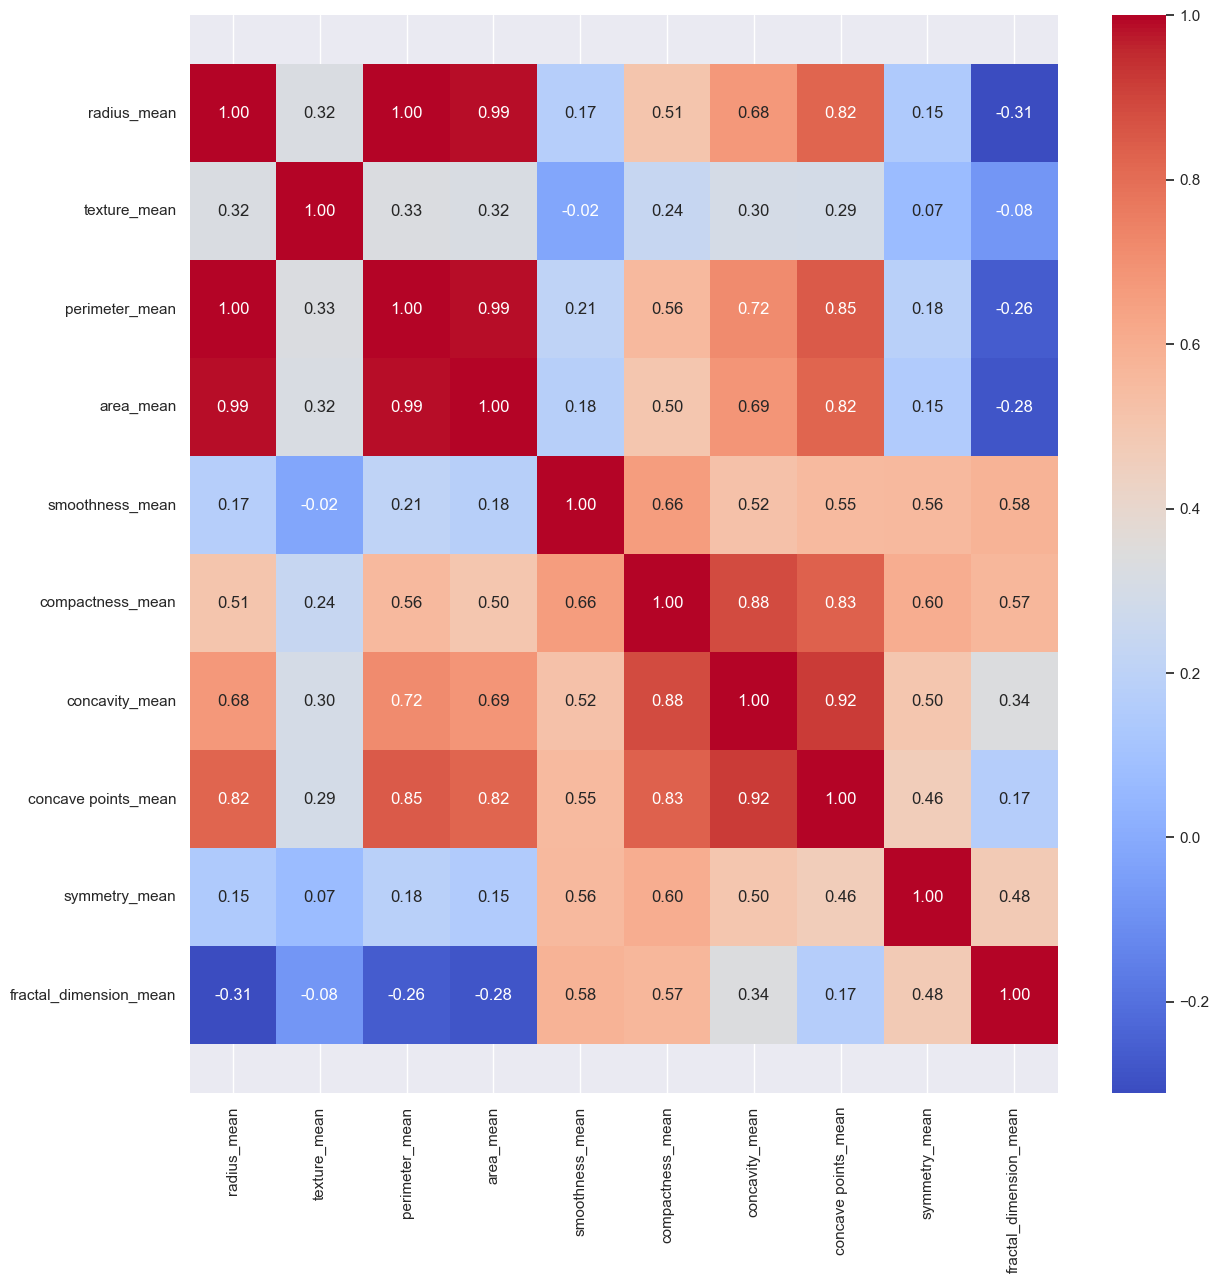

In [10]:
corr = bc[mean_labels].corr()
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, cbar=True, annot=True, fmt='.2f', annot_kws={'size':12}, xticklabels=mean_labels, yticklabels=mean_labels,cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

C:\Users\nisar\AppData\Local\Temp\ipykernel_27260\213907803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yn.loc[:,'y'] = pd.Series(y)
c:\Users\nisar\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


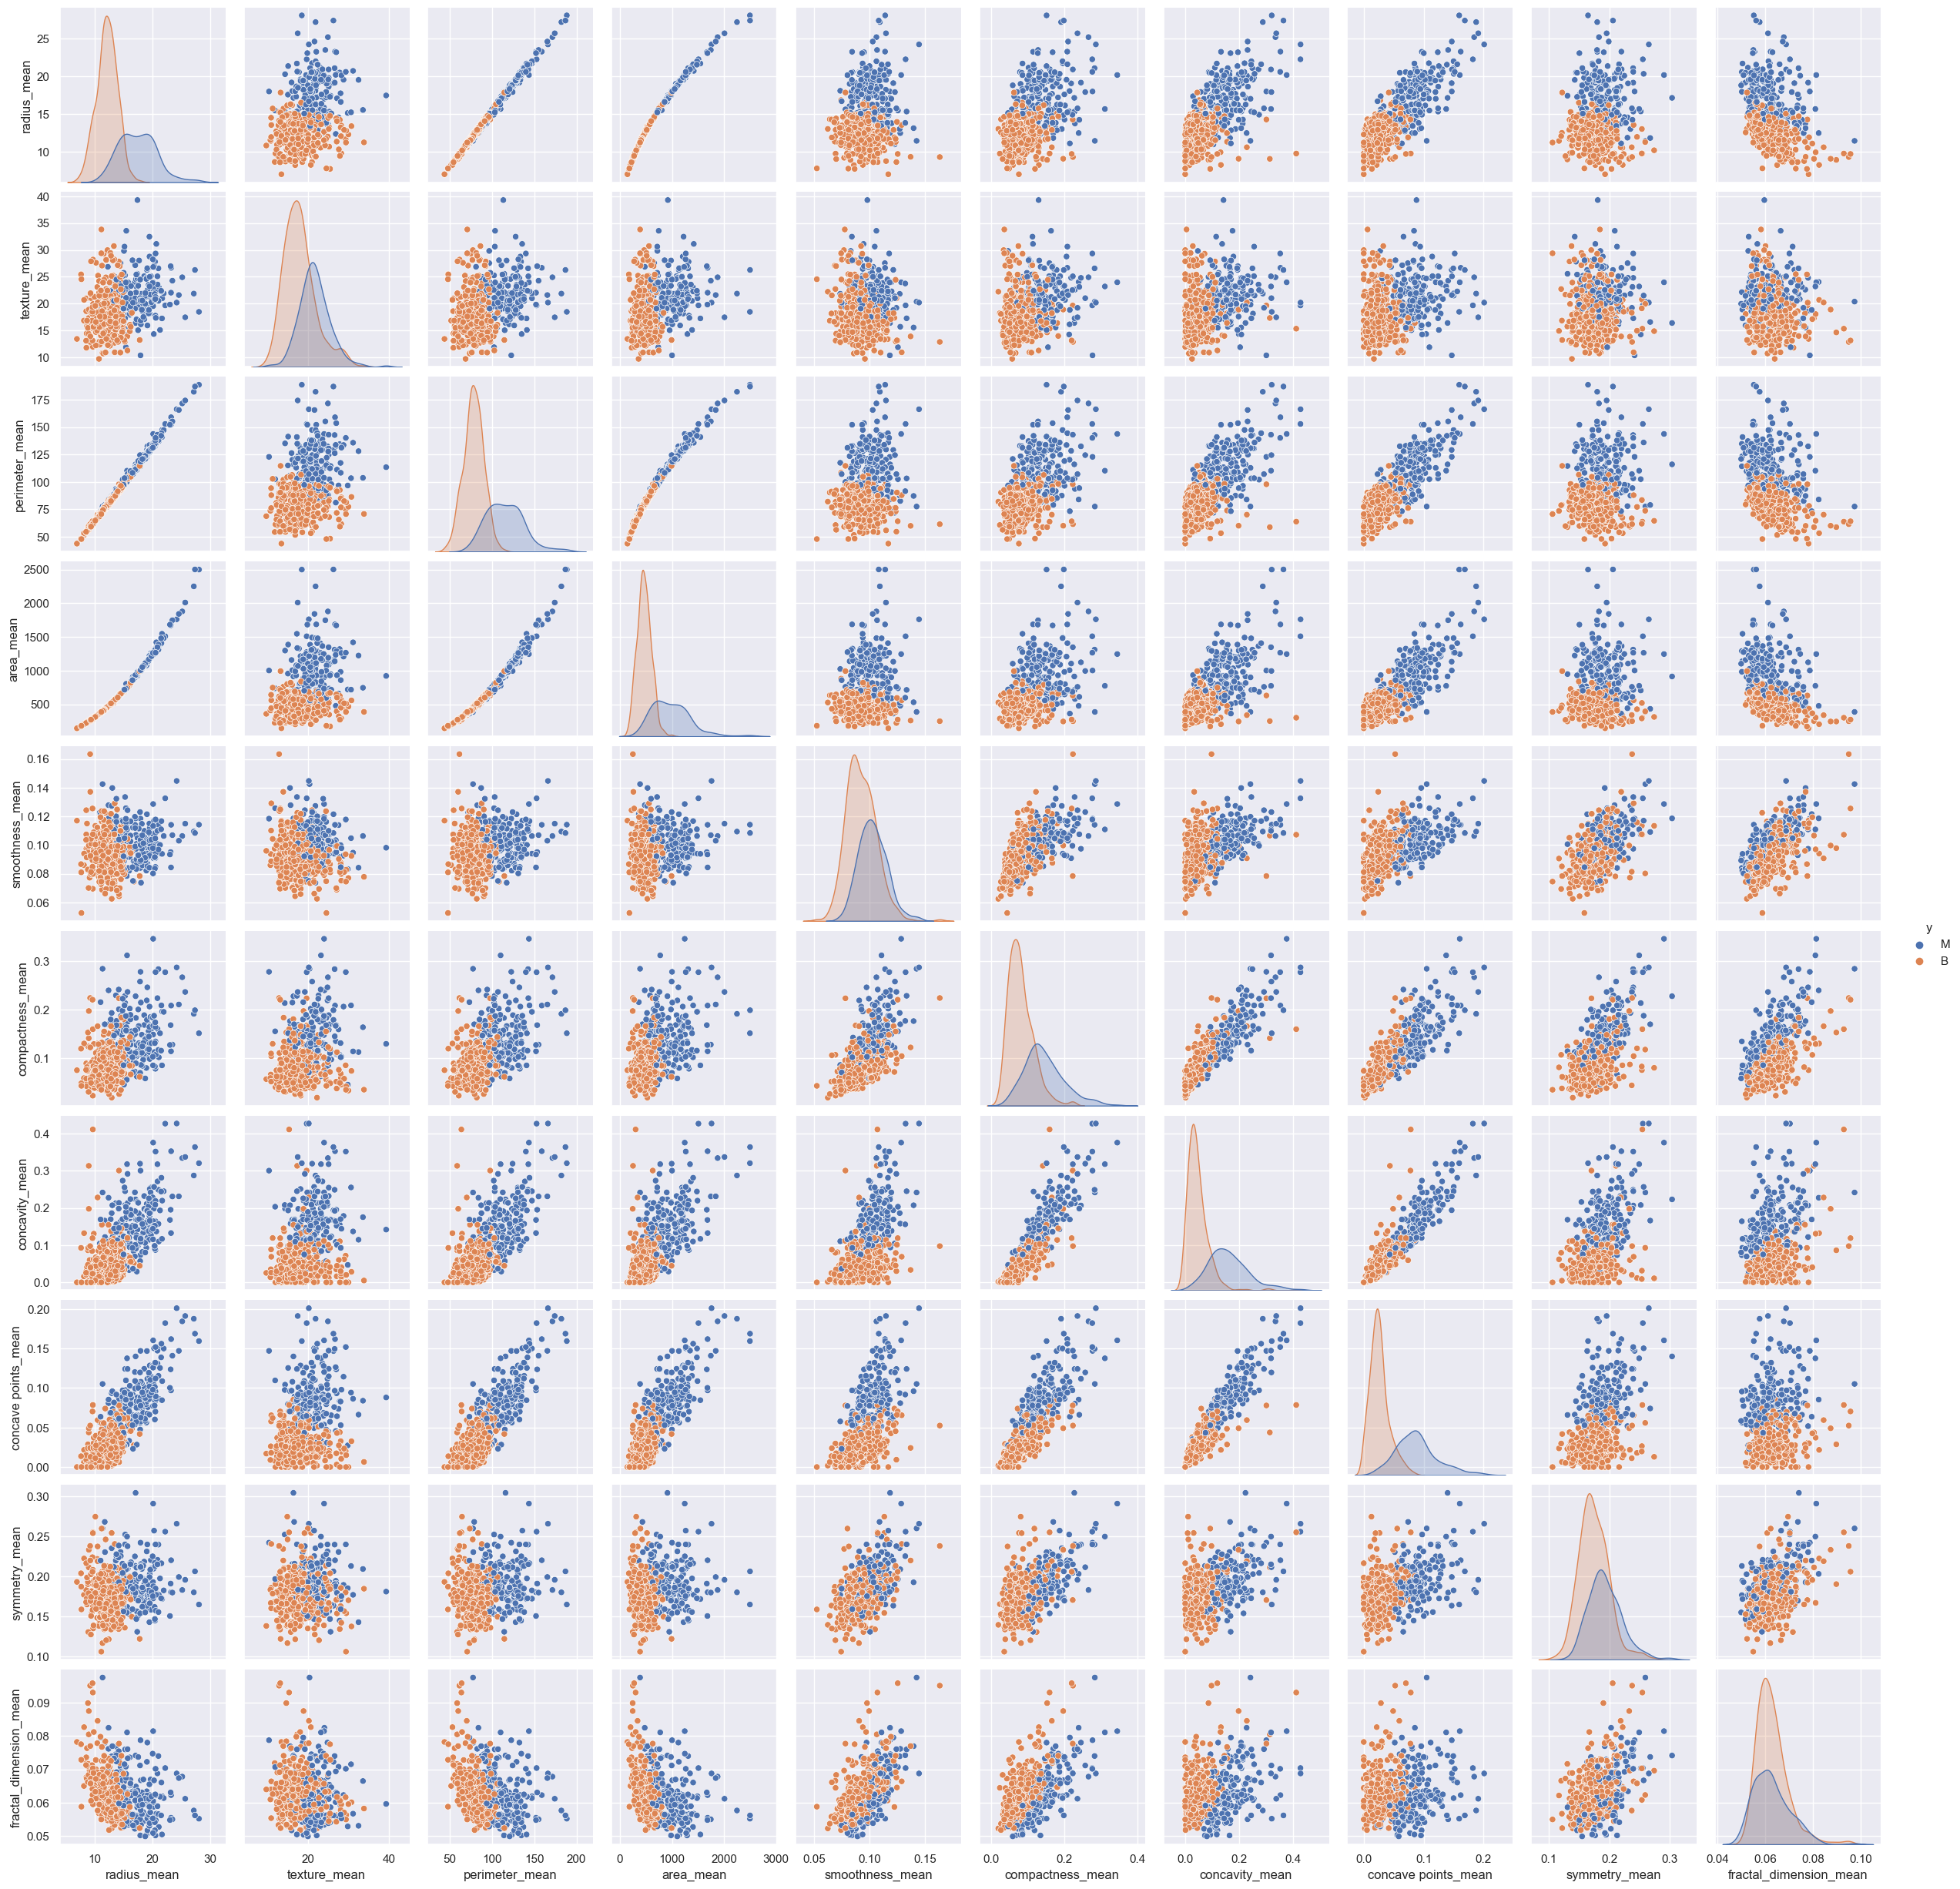

In [11]:
labels_to_remove = ['id', 'Unnamed: 32']
yni = bc.drop(labels_to_remove, axis = 1)
yn = bc1[mean_labels]
yn.loc[:,'y'] = pd.Series(y)
sns.pairplot(yn, hue = 'y')
plt.show()

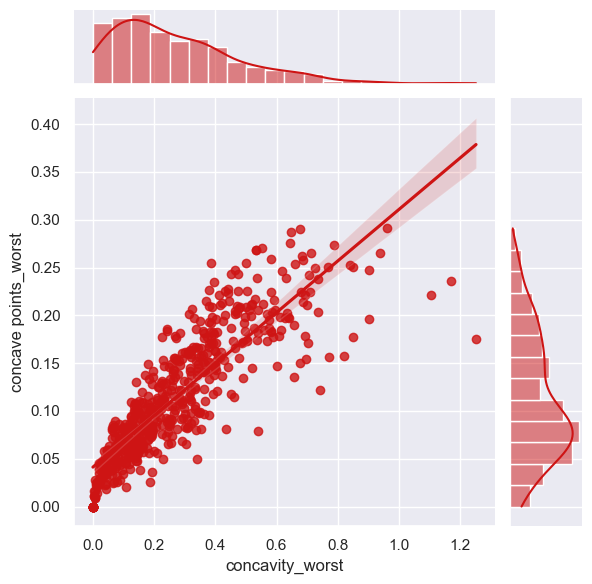

In [15]:
sns.jointplot(data = bc, x='concavity_worst', y = 'concave points_worst', kind="reg",color="#ce1414")
plt.show()

In [16]:
label = ['B','M']
y1 = y.apply(label.index)
y1 = np.array(y1)
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [17]:
X_train, X_test, y_train, y_test = train_test_split(np.array(bc1), y1, random_state = 7)


In [ ]:
df_mean = list(bc1.columns[0:10])
df_se = list(bc1.columns[10:20])
df_worst = list(bc1.columns[20:30])

for i in range(10):
    for j in range(i,10):
        if(i!=j):   
            sns.regplot(x=bc.loc[:,df_worst[i]], y=bc.loc[:,df_worst[i]],
                        scatter_kws={"color":"green","alpha":0.8,"s":40},
                        line_kws={"color": "red"})
            sns.set(style="white",color_codes=True)
            plt.xlabel(str(df_worst[i]))
            plt.ylabel(str(df_worst[j]))
            plt.show()

In [19]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,
                          title=None,cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, DT_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


The accuracy of train set using Decision Tree: 99.296%
The accuracy of the test set using Decision Tree: 90.210%


Confusion Matrix for Decision Tree



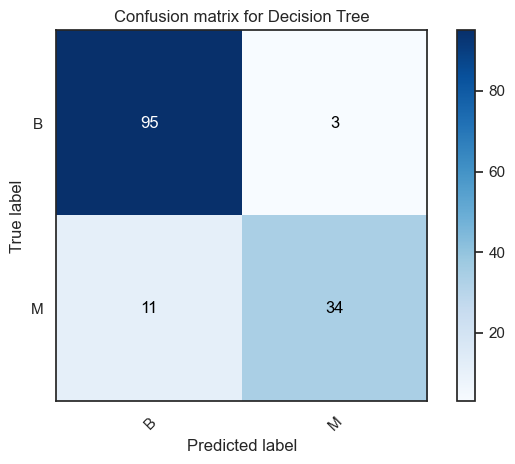


The accuracy of train set using Random Forest: 	100.000 %
The accuracy of the test set using Random Forest: 	97.203 %

Confusion Matrix for Random Forest



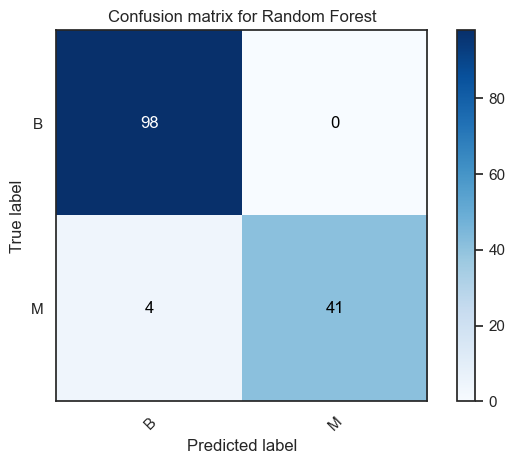

In [20]:
DT1 = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
RF1 = RandomForestClassifier(n_estimators = 400).fit(X_train, y_train)


print('The accuracy of train set using Decision Tree: {:.3f}%' .format(DT1.score(X_train, y_train)*100))
print('The accuracy of the test set using Decision Tree: {:.3f}%\n' .format(DT1.score(X_test, y_test)*100))
print("\nConfusion Matrix for Decision Tree\n")

plot_confusion_matrix(y_test, DT1.predict(X_test), classes=label,
                      title='Confusion matrix for Decision Tree')
plt.show()
print('\nThe accuracy of train set using Random Forest: \t{:.3f} %' .format(RF1.score(X_train, y_train)*100))
print('The accuracy of the test set using Random Forest: \t{:.3f} %' .format(RF1.score(X_test, y_test)*100))
print("\nConfusion Matrix for Random Forest\n")
#print(confusion_matrix(y_test, RF1.predict(X_test)))

plot_confusion_matrix(y_test, RF1.predict(X_test), classes=label,
                      title='Confusion matrix for Random Forest')
plt.show()


In [21]:
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import classification_report

ps1 = ps(y_test,RF1.predict(X_test))
rs1 = rs(y_test,RF1.predict(X_test)) 

print('The precision of the test set with Random Forest: \t{:.3f}' .format(ps1))
print('The recall of the test set with Random Forest:  \t{:.3f}' .format(rs1))

f1 = 2*ps1*rs1/(ps1+rs1)
print('The f1 score of the test set with Random Forest: \t{:.3f} ' .format(f1))

print(classification_report(y_test,RF1.predict(X_test)))


The precision of the test set with Random Forest: 	1.000
The recall of the test set with Random Forest:  	0.911
The f1 score of the test set with Random Forest: 	0.953 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.91      0.95        45

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



c:\Users\nisar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of train set with Logistic Regression: 95.540%
The accuracy of the test set with Logistic Regression: 94.406%



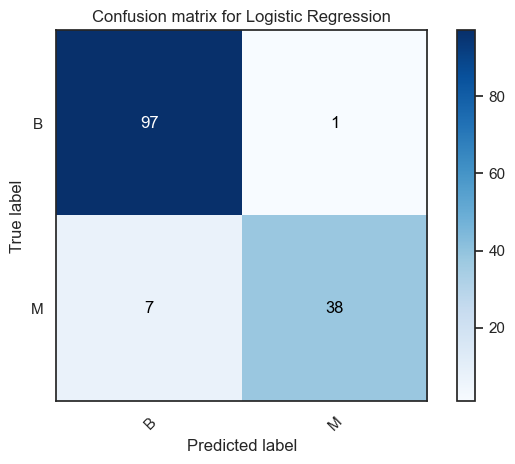


The precision of the test set with Logistic Regression: 	0.974
The recall of the test set with Logistic Regression:  	0.844

The f1 score of the test set with Logistic Regression: 	0.905 


In [22]:
LR1 = LogisticRegression()
LR1.fit(X_train,y_train)

print('The accuracy of train set with Logistic Regression: {:.3f}%' .format(LR1.score(X_train, y_train)*100))
print('The accuracy of the test set with Logistic Regression: {:.3f}%\n' .format(LR1.score(X_test, y_test)*100))

plot_confusion_matrix(y_test, LR1.predict(X_test), classes=label,
                      title='Confusion matrix for Logistic Regression')
plt.show()

ps1 = ps(y_test,LR1.predict(X_test))
rs1 = rs(y_test,LR1.predict(X_test)) 

print('\nThe precision of the test set with Logistic Regression: \t{:.3f}' .format(ps1))
print('The recall of the test set with Logistic Regression:  \t{:.3f}' .format(rs1))

f1 = 2*ps1*rs1/(ps1+rs1)
print('\nThe f1 score of the test set with Logistic Regression: \t{:.3f} ' .format(f1))


In [23]:
#parameters = {'kernel':('poly', 'rbf'), 'C':[0.1, 1, 10]}

clf1 = SVC(kernel='linear',C=.8)

#clf1 = GridSearchCV(svc1,parameters,cv=3)
clf1.fit(X_train,y_train)

print('The accuracy of train set with SVM: {:.3f}%' .format(clf1.score(X_train, y_train)*100))
print('The accuracy of the test set with SVM: {:.3f}%' .format(clf1.score(X_test, y_test)*100))

ps1 = ps(y_test,clf1.predict(X_test))
rs1 = rs(y_test,clf1.predict(X_test)) 

print('\nThe precision of the test set with SVM: \t{:.3f}' .format(ps1))
print('The recall of the test set with SVM:  \t{:.3f}' .format(rs1))

f1 = 2*ps1*rs1/(ps1+rs1)
print('\nThe f1 score of the test set with SVM: \t{:.3f} ' .format(f1))


The accuracy of train set with SVM: 96.948%
The accuracy of the test set with SVM: 95.105%

The precision of the test set with SVM: 	0.975
The recall of the test set with SVM:  	0.867

The f1 score of the test set with SVM: 	0.918 


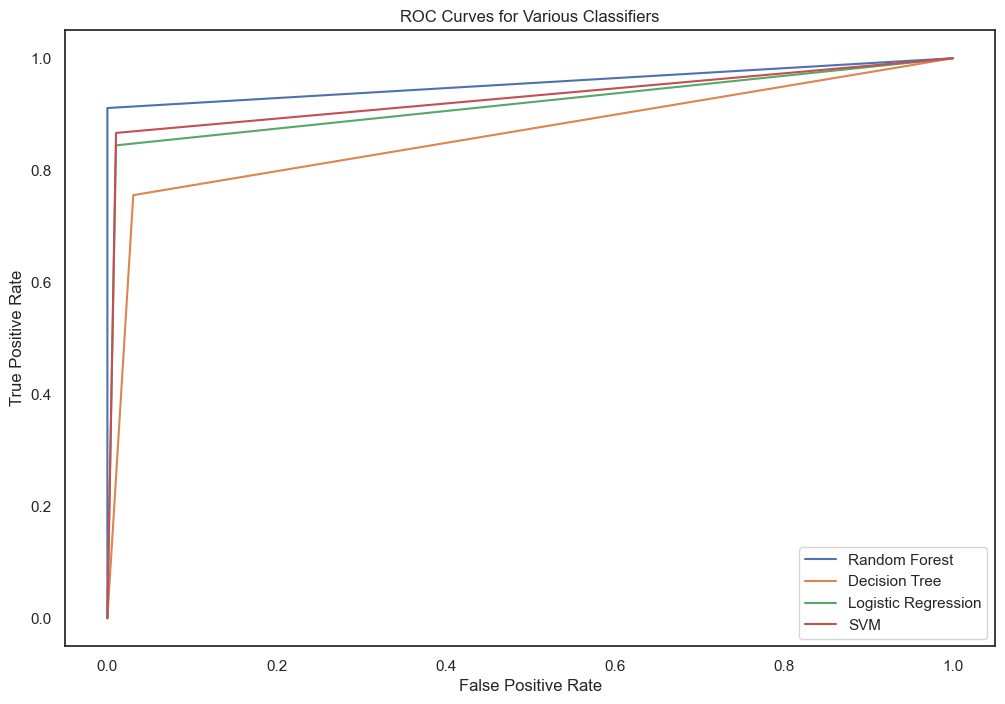

In [25]:
from sklearn.metrics import roc_curve

fpr1,tpr1, threshold1 = roc_curve(y_test,RF1.predict(X_test))
fpr2,tpr2, threshold2 = roc_curve(y_test,DT1.predict(X_test))
fpr3,tpr3, threshold3 = roc_curve(y_test,LR1.predict(X_test))
fpr4,tpr4, threshold4 = roc_curve(y_test,clf1.predict(X_test))

plt.figure(figsize=(12,8))
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.plot(fpr4,tpr4)
plt.title("ROC Curves for Various Classifiers")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forest','Decision Tree', 'Logistic Regression','SVM'])
plt.show()